###  Business Understanding

The goal of this project is to predict hotel booking cancellations based on historical reservation data. Cancellations negatively affect revenue, staffing, inventory planning, and customer experience.

By using machine learning to anticipate cancellations, hotel managers can take proactive steps such as:
- Overbooking optimization
- Resource planning (cleaning staff, rooms, etc.)
- Offering promotions to guests at risk of cancellation

Solving this problem with data mining improves decision-making, increases revenue, and gives a competitive edge in hospitality management.


# Imports and reading in the data

In [10]:
import pandas as pd
df = pd.read_csv('data/Hotel Reservations.csv')
df = df.drop(["Booking_ID"], axis=1)

In [11]:
#using URL as option since public now.

import pandas as pd

url = "https://raw.githubusercontent.com/JacoboGanon/MVT-code/main/data/Hotel%20Reservations.csv"
df = pd.read_csv(url)
df = df.drop(["Booking_ID"], axis=1)

# EDA
I will start by exploring the data with some simple commands like info, describe, unique values etc.

In [12]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [14]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [15]:
for column in df.columns:
    print(f"\n{column} unique values:")
    print(df[column].value_counts())


no_of_adults unique values:
no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64

no_of_children unique values:
no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64

no_of_weekend_nights unique values:
no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64

no_of_week_nights unique values:
no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64

type_of_meal_plan unique values:
type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

required_car_parking_space unique values:
required_car_parking_space
0    35151
1     1124
Name: cou

## Findings
From this we can see that there are no null values anywhere and there are also no placeholders for missing data which is good because we won't have to clean the data, any transformations we make will be for data analysis and model performance.

We also know that a model that just assumes there are no cancelations is correct about 66% of the time meaning our model has to have at least this performance.

The data appears to be from two years so making any predictions based on the year will likely not yield results, specially since important information about the year is more related to news than the number.

There are only 930 repeated guests, we will be able to make some conclusion from these guests but it will not apply to the majority of the business.

Finally there does not appear to be any clear outliers so we will not need to search for outliers and remove them to make models more accurate.

## Model Training
We will be using a classic 80/20 training to test split to make sure that data is not overfitted even though most of our models are complicated to overfit.

The models we will be training, testing, and checking the performance of will be the following:
- Random forest since it is good at classifying and good to use with a lot of variables and seeing the importance of features.
- Logistic regression since it is a very simple model that we will be able to get a lot of information from.
- Neural network to see if it has better performance.

In [16]:
# Split the data
from sklearn.model_selection import train_test_split
X = df.drop(["booking_status"], axis=1)
X = pd.get_dummies(X)
y = df["booking_status"]

# Using random state 0 to have reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
# Random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [18]:
# Test the random forest
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]
rf_accuracy = accuracy_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='Canceled')
roc_auc = auc(fpr, tpr)
rf_precision = precision_score(y_test, y_pred, pos_label="Canceled")
rf_recall = recall_score(y_test, y_pred, pos_label="Canceled")

print(f"Accuracy: {rf_accuracy}\nPrecision: {rf_precision}\nRecall: {rf_recall}\nAUC: {roc_auc}")

Accuracy: 0.9033769813921434
Precision: 0.8913443830570903
Recall: 0.8063306955435235
AUC: 0.04529770335015265


In [19]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

# Since logistic regression is much faster I'm going to use the full dataset for this one
X = df.drop(["booking_status"], axis=1)
X = pd.get_dummies(X)
y = df["booking_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [20]:
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]
lr_accuracy = accuracy_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='Canceled')
roc_auc = auc(fpr, tpr)
lr_precision = precision_score(y_test, y_pred, pos_label="Canceled")
lr_recall = recall_score(y_test, y_pred, pos_label="Canceled")

print(f"Accuracy: {lr_accuracy}\nPrecision: {lr_precision}\nRecall: {lr_recall}\nAUC: {roc_auc}")

Accuracy: 0.7902136457615437
Precision: 0.7309511297950604
Recall: 0.5793419408579759
AUC: 0.14871799228003302


In [21]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(100, 80, 50), random_state = 0)
nn.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 80, 50), random_state=0)

In [22]:
y_pred = nn.predict(X_test)
y_pred_proba = nn.predict_proba(X_test)[:, 1]
nn_accuracy = accuracy_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='Canceled')
roc_auc = auc(fpr, tpr)
nn_precision = precision_score(y_test, y_pred, pos_label="Canceled")
nn_recall = recall_score(y_test, y_pred, pos_label="Canceled")

print(f"Accuracy: {nn_accuracy}\nPrecision: {nn_precision}\nRecall: {nn_recall}\nAUC: {roc_auc}")

Accuracy: 0.8202618883528601
Precision: 0.7912904938927243
Recall: 0.6205747605164514
AUC: 0.12098953756220583


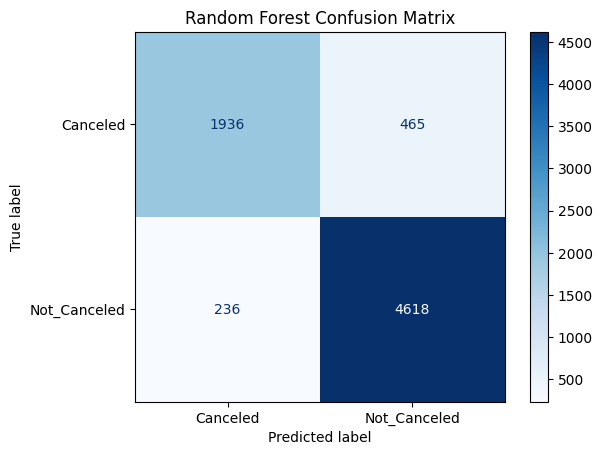

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=["Canceled", "Not_Canceled"])
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Canceled", "Not_Canceled"])
disp_rf.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

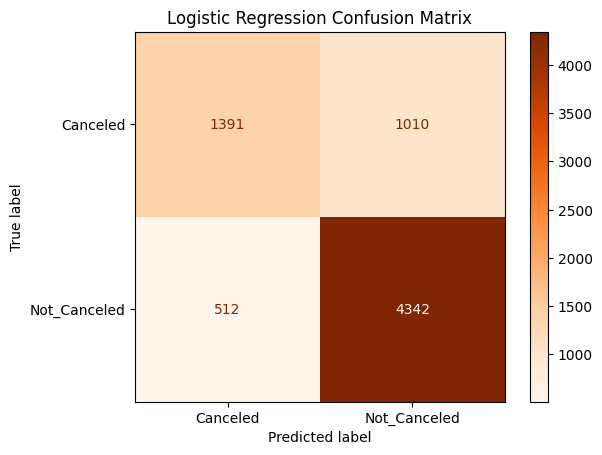

In [24]:
y_pred_lr = lr.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=["Canceled", "Not_Canceled"])
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=["Canceled", "Not_Canceled"])
disp_lr.plot(cmap='Oranges')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

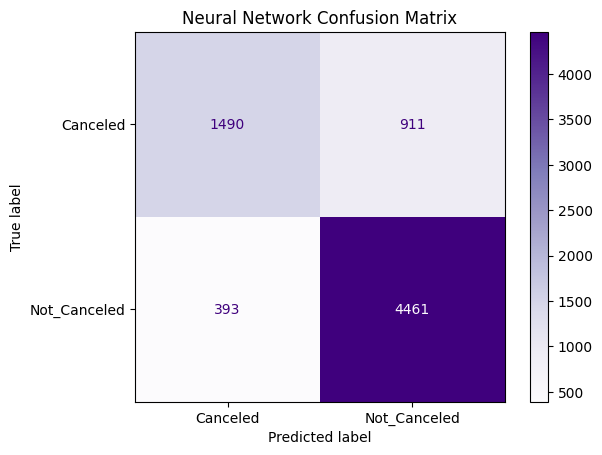

In [25]:
y_pred_nn = nn.predict(X_test)
cm_nn = confusion_matrix(y_test, y_pred_nn, labels=["Canceled", "Not_Canceled"])
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=["Canceled", "Not_Canceled"])
disp_nn.plot(cmap='Purples')
plt.title("Neural Network Confusion Matrix")
plt.show()

In [26]:
#ranking feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance.head(10))

                       Feature  Importance
5                    lead_time    0.310203
12          avg_price_per_room    0.156196
13      no_of_special_requests    0.106552
8                 arrival_date    0.095868
7                arrival_month    0.083748
3            no_of_week_nights    0.053648
2         no_of_weekend_nights    0.037711
6                 arrival_year    0.026439
29  market_segment_type_Online    0.024239
0                 no_of_adults    0.023356


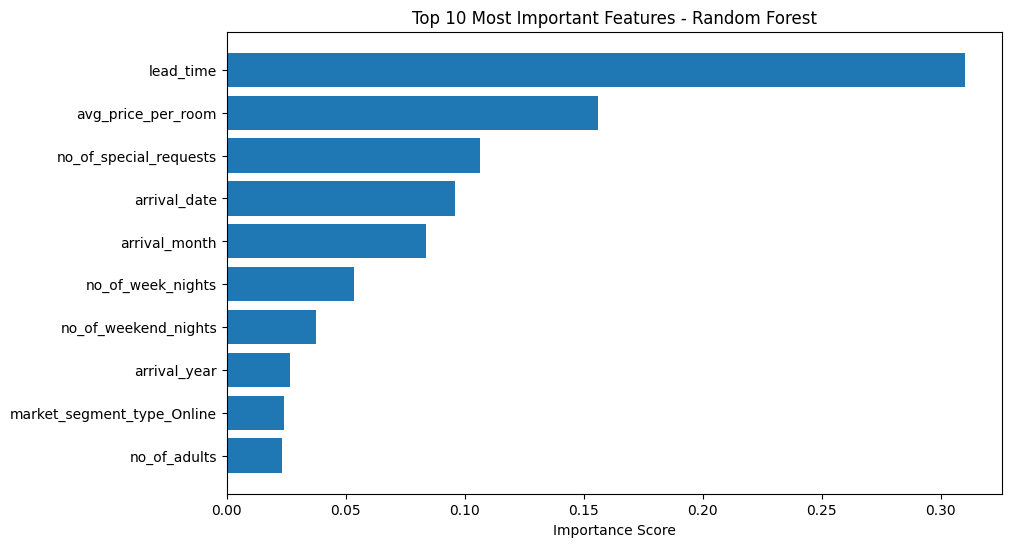

In [27]:
#Top 10 Features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'].head(10), feature_importance['Importance'].head(10))
plt.gca().invert_yaxis()
plt.title("Top 10 Most Important Features - Random Forest")
plt.xlabel("Importance Score")
plt.show()

As we have found earlier, the RANDOM FOREST is the model with the highest accuracy, we decided to apply 5 fold cross validation to evaluate the model performance on different subsets of the data. This will help us ensure that the accuracy is not just depending on one train-test split. The average accuracy showed 90.14% which shows the model is consistent in predicting booking cancellations with high reliability across different samples of the data. This strengthens our confidence that the Random Forest is not overfitting to a specific subset.

In [28]:
from sklearn.model_selection import cross_val_score

rf_cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print("Random Forest 5-Fold CV Accuracy:", rf_cv_scores.mean())


Random Forest 5-Fold CV Accuracy: 0.9013645761543764
